In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [6]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()                                   
    text = re.sub(r'[^a-zA-Z\s]', '', text)               
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(clean_text)

In [30]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
lr = LogisticRegression()
lr_model=lr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [34]:
nb = MultinomialNB()
nb_model=nb.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)


In [35]:
lr_accuracy=accuracy_score(y_test,lr_pred)
nb_accuracy=accuracy_score(y_test,nb_pred)
print(f"Logistic Regression Accuracy:{lr_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")


Logistic Regression Accuracy:0.8852
Naive Bayes Accuracy: 0.8518


In [36]:
print("\nClassification Report:\n", classification_report(y_test, lr_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



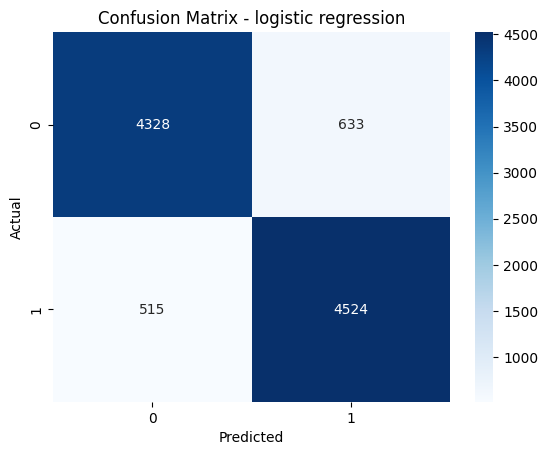

In [37]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - logistic regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


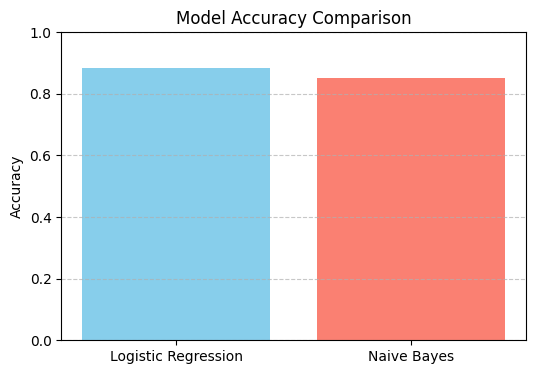

In [38]:
models = ['Logistic Regression', 'Naive Bayes']
accuracies = [lr_accuracy, nb_accuracy]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [42]:
# =====  Predict for new review =====
new_review = ["I loved this movie "]
new_review_tfidf = vectorizer.transform(new_review)
pred_label = lr_model.predict(new_review_tfidf)[0]
pred_label

1

In [43]:
print(f"\nPrediction for new review: {'Positive' if pred_label == 1 else 'Negative'}")


Prediction for new review: Positive
